In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import time


import random
import sys
sys.setrecursionlimit(2000000)

In [11]:
def calculate_match_score(student_input, mentor):
    score = 0
    if mentor['Keahlian'] == student_input['Requested Expertise']:
        score += 50
    if mentor['Pengalaman (tahun)'] >= student_input['Minimum Experience (years)']:
        score += 10
    if mentor['Spesialisasi'] == student_input['Preferred Specialization']:
        score += 30
    if mentor['Ketersediaan (jam/minggu)'] >= student_input['Required Availability (hours/week)']:
        score += 5
    if mentor['Peringkat (1-5)'] >= student_input['Minimum Rating']:
        score += 5
    return score

In [14]:
def find_best_mentor_iterative(mentors, student):
    best_mentor = None
    highest_score = -1

    for _, mentor in mentors.iterrows():
        # Hitung skor kecocokan mentor untuk mahasiswa
        mentor_score = calculate_match_score(student, mentor)

        # Perbarui mentor terbaik jika skor lebih tinggi
        if mentor_score > highest_score:
            highest_score = mentor_score
            best_mentor = mentor['Nama Mentor']
    
    return best_mentor, highest_score


In [15]:
def find_best_mentor_recursive(mentors, student, index=0, best_mentor=None, highest_score=-1):
    if index >= len(mentors):
        return best_mentor, highest_score
    mentor = mentors.iloc[index]
    score = calculate_match_score(student, mentor)

    if score > highest_score:
        best_mentor = mentor['Nama Mentor']
        highest_score = score

    return find_best_mentor_recursive(mentors, student, index + 1, best_mentor, highest_score)


In [16]:
# Generate mentors and test different dataset sizes
def generate_mentor_data(num_mentors):
    return pd.DataFrame({
        'Nama Mentor': [f'Mentor_{i}' for i in range(num_mentors)],
        'Keahlian': random.choices(['Seni', 'Literatur', 'Algoritma dan Pemrograman', 'Matematika'], k=num_mentors),
        'Pengalaman (tahun)': random.choices(range(1, 21), k=num_mentors),
        'Ketersediaan (jam/minggu)': random.choices(range(5, 40), k=num_mentors),
        'Peringkat (1-5)': [round(random.uniform(1, 5), 1) for _ in range(num_mentors)],
        'Spesialisasi': random.choices(['Kecerdasan Buatan', 'Analisis Kompleksitas Algoritma'], k=num_mentors),
        'Mode Pengajaran': random.choices(['Offline', 'Online', 'Hybrid'], k=num_mentors),
    })

In [20]:
# Input mahasiswa
student_input = {
    'Requested Expertise': 'Algoritma dan Pemrograman',
    'Minimum Experience (years)': 5,
    'Preferred Specialization': 'Analisis Kompleksitas Algoritma',
    'Required Availability (hours/week)': 10,
    'Minimum Rating': 4.0
}

# Test sizes
sizes = [10, 100, 1000, 10000, 100000, 1000000]
results = []

for size in sizes:
    mentors = generate_mentor_data(size)

    # Iterative
    start_time = time.time()
    iterative_best_mentor, iterative_highest_score = find_best_mentor_iterative(mentors, student_input)
    iterative_time = time.time() - start_time

    # Recursive
    start_time = time.time()
    recursive_best_mentor, recursive_highest_score = find_best_mentor_recursive(mentors, student_input)
    recursive_time = time.time() - start_time

    # Store results
    results.append((size, iterative_time, iterative_best_mentor, iterative_highest_score, 
                    recursive_time, recursive_best_mentor, recursive_highest_score))

# Convert results to a DataFrame for a clean table format
results_df = pd.DataFrame(results, columns=[
    "Dataset Size", 
    "Iterative Time (s)", 
    "Best Mentor (Iterative)", 
    "Score (Iterative)", 
    "Recursive Time (s)", 
    "Best Mentor (Recursive)", 
    "Score (Recursive)"
])

# Print the results table
print(results_df)


   Dataset Size  Iterative Time (s) Best Mentor (Iterative)  \
0            10            0.000000                Mentor_5   
1           100            0.004007               Mentor_14   
2          1000            0.040001              Mentor_114   
3         10000            0.375648              Mentor_139   
4        100000            3.733565               Mentor_10   
5       1000000           37.133957               Mentor_53   

   Score (Iterative)  Recursive Time (s) Best Mentor (Recursive)  \
0                 95            0.001007                Mentor_5   
1                 95            0.006001               Mentor_14   
2                100            0.044024              Mentor_114   
3                100            0.435098              Mentor_139   
4                100            5.225808               Mentor_10   
5                100           52.456992               Mentor_53   

   Score (Recursive)  
0                 95  
1                 95  
2           

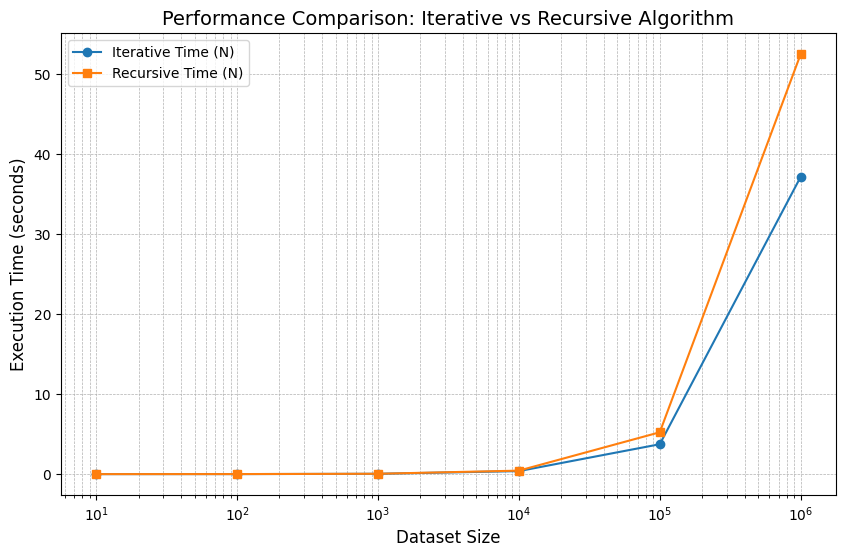

In [22]:
# Extract data for plotting
dataset_sizes = results_df["Dataset Size"]
iterative_times = results_df["Iterative Time (s)"]
recursive_times = results_df["Recursive Time (s)"]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, iterative_times, marker='o', label="Iterative Time (N)")
plt.plot(dataset_sizes, recursive_times, marker='s', label="Recursive Time (N)")

# Add titles and labels
plt.title("Performance Comparison: Iterative vs Recursive Algorithm", fontsize=14)
plt.xlabel("Dataset Size", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.xscale("log")  # Use a logarithmic scale for dataset sizes
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()